In [10]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm
import itertools

# plt.style.use('fivethirtyeight')
# %matplotlib inline
# from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 13, 8

import plotly.express as px

# import collections

import functions as fun



import datetime
import seaborn as sns
sns.set()

In [11]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
%reload_ext autoreload

In [13]:
df = pd.read_csv('csv/chicago_melted.csv')
df.head()

,ZipCode,Time,Value
0,60657,2011-01-01,729300.0
1,60614,2011-01-01,923000.0
2,60640,2011-01-01,600000.0
3,60647,2011-01-01,286500.0
4,60618,2011-01-01,317400.0


In [14]:
zip_ts = df.loc[df['ZipCode']==60647].drop(['ZipCode'],axis=1)
# zip_ts['Time'] = pd.to_datetime(zip_ts['Time'], format='%Y-%m')
zip_ts.set_index('Time', inplace = True)
zip_ts.head()

,Value
Time,
2011-01-01,286500.0
2011-02-01,285800.0
2011-03-01,283800.0
2011-04-01,282100.0
2011-05-01,281700.0


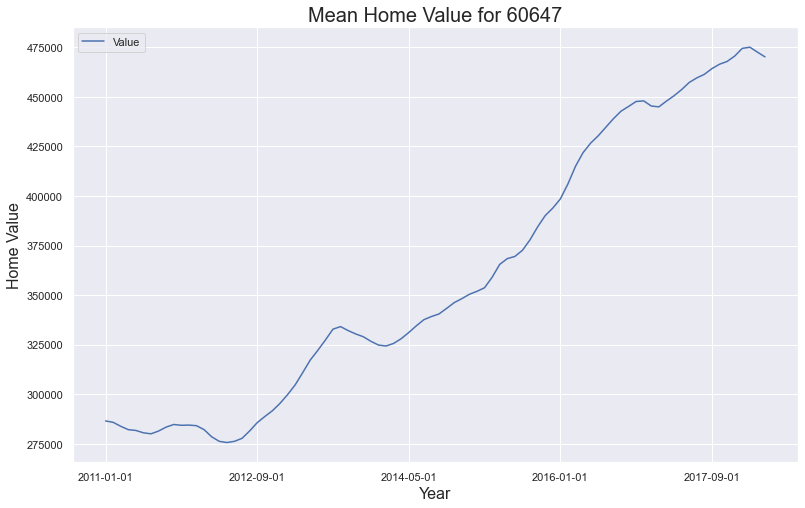

In [15]:
zip_ts.plot(figsize=(13, 8))
plt.xlabel("Year", fontsize=16)
plt.ylabel("Home Value", fontsize=16)
plt.title("Mean Home Value for 60647", fontsize=20)
plt.show()

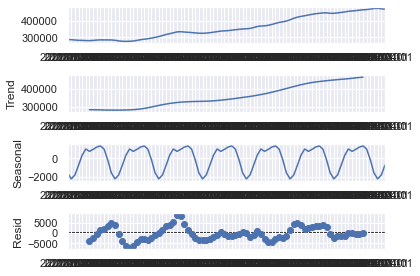

In [16]:
decomposition = sm.tsa.seasonal_decompose(zip_ts, model='additive', period=12)
fig = decomposition.plot()
plt.show()

In [17]:
# mul_decomposition = sm.tsa.seasonal_decompose(zip_ts, model='mul', period=12)
# fig = mul_decomposition.plot()
# plt.show()

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.graphics.tsaplots as tsa

In [19]:
def df_decompose(df):
    
    trend = seasonal_decompose(df, period=12, model='additive').trend
    seasonal = seasonal_decompose(df, period=12, model='additive').seasonal
    residual = seasonal_decompose(df, period=12, model='additive').resid

 
    plt.figure(figsize=(12,8))
    plt.title(f"Decomposition for {df}")
    plt.subplot(411)
    plt.plot(df, label='Original', color="blue")
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color="blue")
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonality', color="blue")
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color="blue")
    plt.legend(loc='best')
    plt.tight_layout();
    
    return residual.dropna()

### Used an additive model for decomp becaue the trend is more linear and constant over time

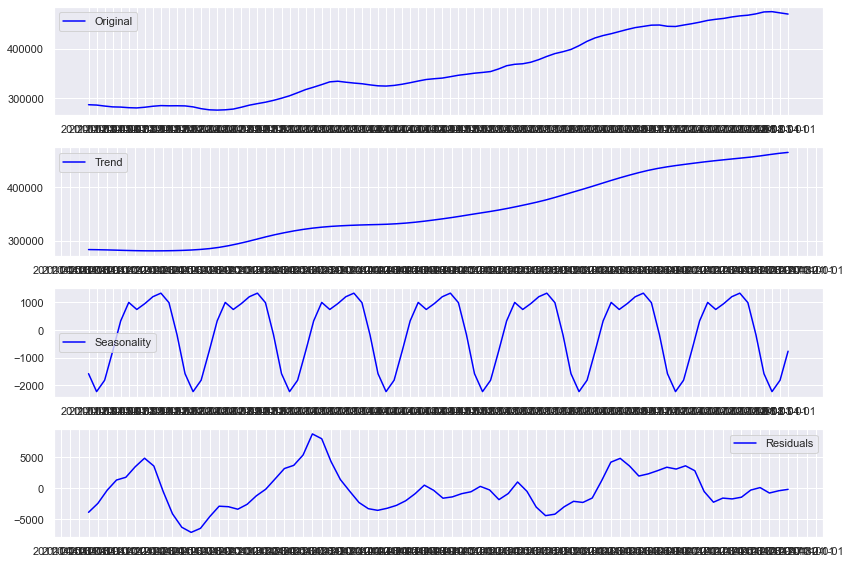

In [20]:
zip_decomp = df_decompose(zip_ts)

In [21]:
def stationarity_check(TS, rolling_window=7):    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = rolling_window, center = False).mean()
    rolstd = TS.rolling(window = rolling_window, center = False).std()
    

    dftest = adfuller(TS) 

    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xticks(rotation=70)
    plt.show(block=False)

    print ('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                             'p-value',
                                             '#Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    pass

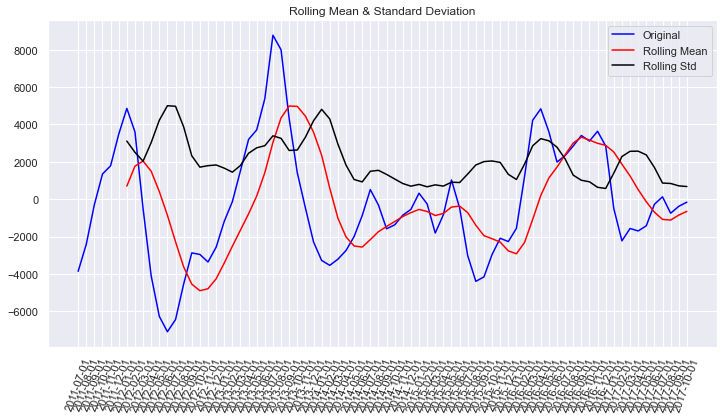

Results of Dickey-Fuller Test:
Test Statistic                 -3.285489
p-value                         0.015540
#Lags Used                      8.000000
Number of Observations Used    67.000000
Critical Value (1%)            -3.531955
Critical Value (5%)            -2.905755
Critical Value (10%)           -2.590357
dtype: float64


In [22]:
stationarity_check(zip_decomp)

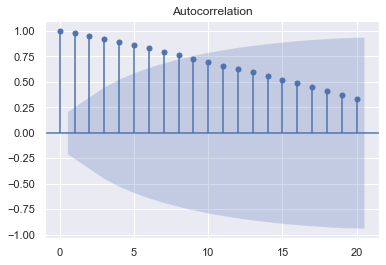

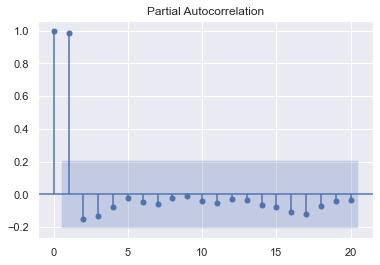

In [23]:
tsa.plot_acf(zip_ts);
tsa.plot_pacf(zip_ts);

We can see on our ACF plots that for most data there is a significant positive correlation up to around 8 lags. This will instruct us on what could be a good order for our MA parameter.

On our PACF plots we see that we might be dealing with an AR order of 1 or 2 for most data.

In [24]:
zip_ts.index = pd.to_datetime(zip_ts.index, format='%Y-%m')
zip_ts.head()

,Value
Time,
2011-01-01,286500.0
2011-02-01,285800.0
2011-03-01,283800.0
2011-04-01,282100.0
2011-05-01,281700.0


In [25]:
zip_ts.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
      

In [26]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

### Tested model first with a time series of one zipcode.

In [27]:
ans = []
for para1 in pdq:
        for para2 in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(zip_ts,
                                                order = para1,
                                                seasonal_order = para2,
                                                enforce_stationarity = False,
                                                enforce_invertibility = False)
                output = mod.fit()
                ans.append([para1, para2, output.aic])
                print('Result' + ' ARIMA {} x {}12 : AIC Calculated = {}'.format(para1, para2, output.aic))
            except:
                continue

Result ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2478.2981972001576
Result ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2102.3771986902475
Result ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1787.1019735095606
Result ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1513.2253783709482
Result ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1720.2754099557158
Result ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1671.8928801546938
Result ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1500.905134485364
Result ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 2027.032044432856
Result ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2390.711926639102
Result ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 2194.26250536535
Result ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1794.814974692212
Result ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2181.2849301789174
Result ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated 

In [28]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df

,pdq,pdqs,aic
0,"(0, 0, 0)","(0, 0, 0, 12)",2478.298197
1,"(0, 0, 0)","(0, 0, 1, 12)",2102.377199
2,"(0, 0, 0)","(0, 1, 0, 12)",1787.101974
3,"(0, 0, 0)","(0, 1, 1, 12)",1513.225378
4,"(0, 0, 0)","(1, 0, 0, 12)",1720.275410
...,...,...,...
59,"(1, 1, 1)","(0, 1, 1, 12)",1091.352307
60,"(1, 1, 1)","(1, 0, 0, 12)",1267.949306
61,"(1, 1, 1)","(1, 0, 1, 12)",1253.674758
62,"(1, 1, 1)","(1, 1, 0, 12)",1106.586250


In [29]:
best_param = ans_df.loc[ans_df['aic'].idxmin()]
best_param

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic           1090.54
Name: 63, dtype: object

In [30]:
# Predictions

ARIMA_MODEL = sm.tsa.statespace.SARIMAX(zip_ts, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(1, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

    
output = ARIMA_MODEL.fit()    


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6595      0.124      5.308      0.000       0.416       0.903
ma.L1          0.8941      0.104      8.627      0.000       0.691       1.097
ar.S.L12       0.0688      0.046      1.503      0.133      -0.021       0.158
ma.S.L12      -0.0613      0.137     -0.448      0.654      -0.329       0.207
sigma2      3.494e+06   9.06e-09   3.86e+14      0.000    3.49e+06    3.49e+06


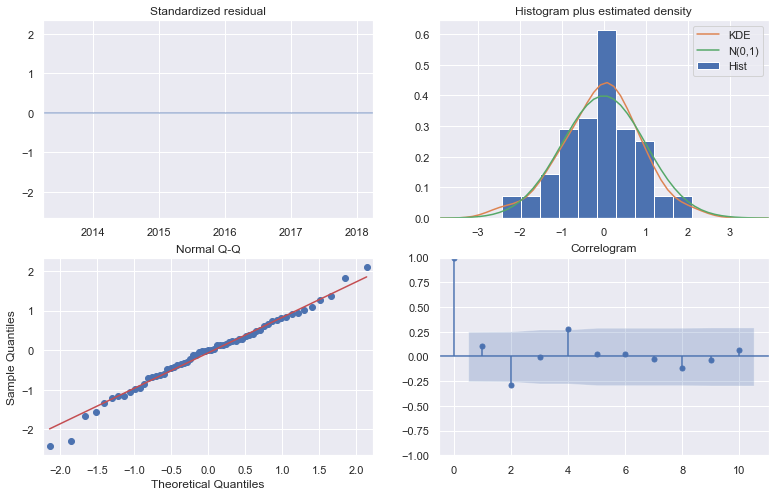

In [31]:
print(output.summary().tables[1])
output.plot_diagnostics(figsize=(13,8));

In [32]:
# predictions starting from 2015-04-01 
pred = output.get_prediction(start=pd.to_datetime('2015-04-01'), dynamic=False)
pred_conf = pred.conf_int()

Passing dynamic=False means that forecasts at each point are generated using the full history up to that point (all lagged values).

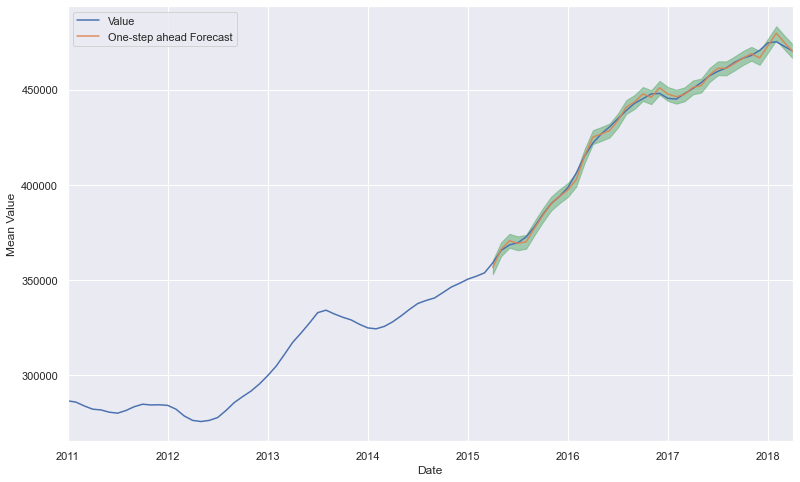

In [33]:
ax = zip_ts['2011':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, figsize=(13 ,8), label='One-step ahead Forecast', alpha=0.9)

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Mean Value')
plt.legend()

plt.show()

In [34]:
chi_forecasted = pd.DataFrame(pred.predicted_mean)
chi_truth = zip_ts['2015-04-01':]

mse = ((chi_forecasted.values - chi_truth.values) ** 2).mean()
rmse = np.sqrt(((chi_forecasted.values - chi_truth.values)**2).mean())
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The RMSE of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 3323693.12
The RMSE of our forecasts is 1823.1


In [35]:
# dynamic predictions 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2015-04-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

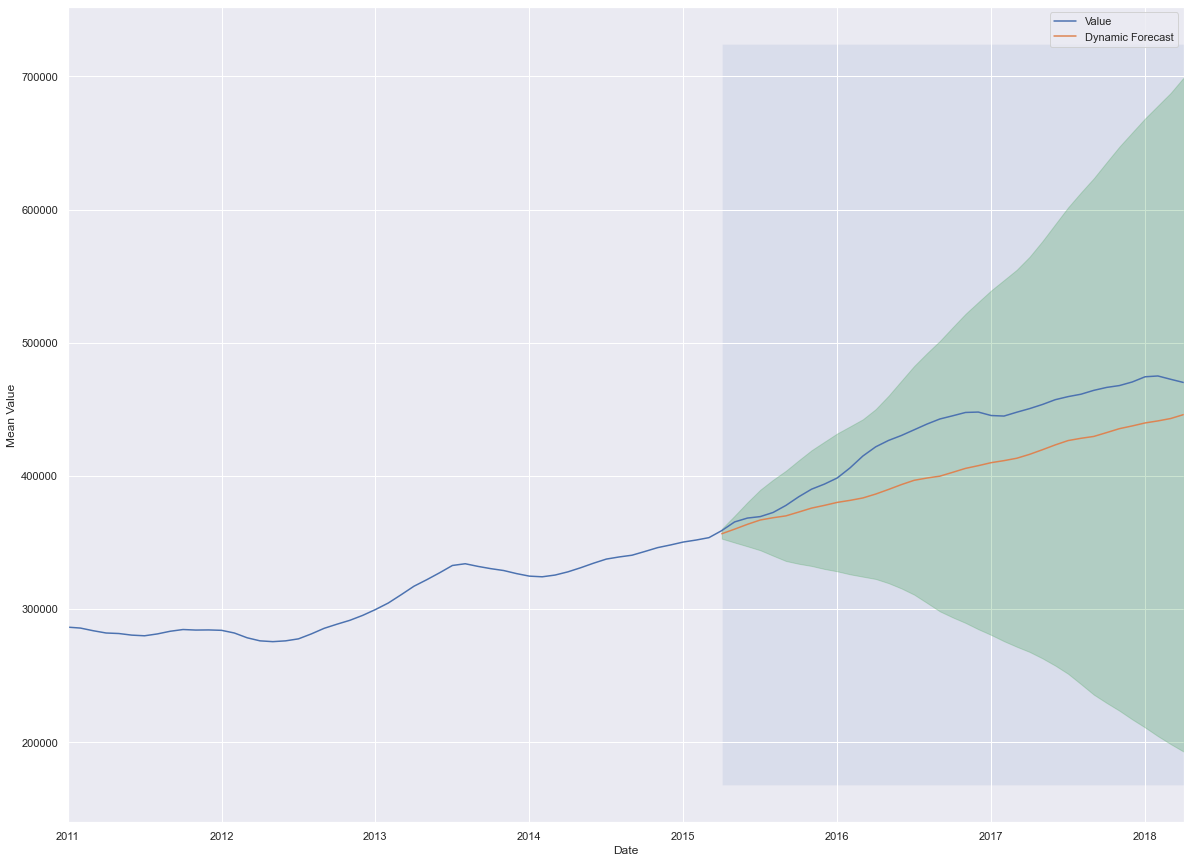

In [36]:
# dynamic forecast 
ax = zip_ts['2011':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2015-04-01'),
                 chi_forecasted.index[-1], 
                 alpha=.1, 
                 zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Mean Value')

plt.legend()
plt.show()

In [37]:
# Dynamic 
chi_forecasted = pd.DataFrame(pred_dynamic.predicted_mean)
chi_truth = zip_ts['2015-04-01':]


mse = ((chi_forecasted.values - chi_truth.values) ** 2).mean()
rmse = np.sqrt(((chi_forecasted.values - chi_truth.values)**2).mean())
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The RMSE of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 925685607.17
The RMSE of our forecasts is 30425.08


In [38]:
# forecast 36 steps (3 years)
prediction = output.get_forecast(steps=36)

pred_conf = prediction.conf_int()

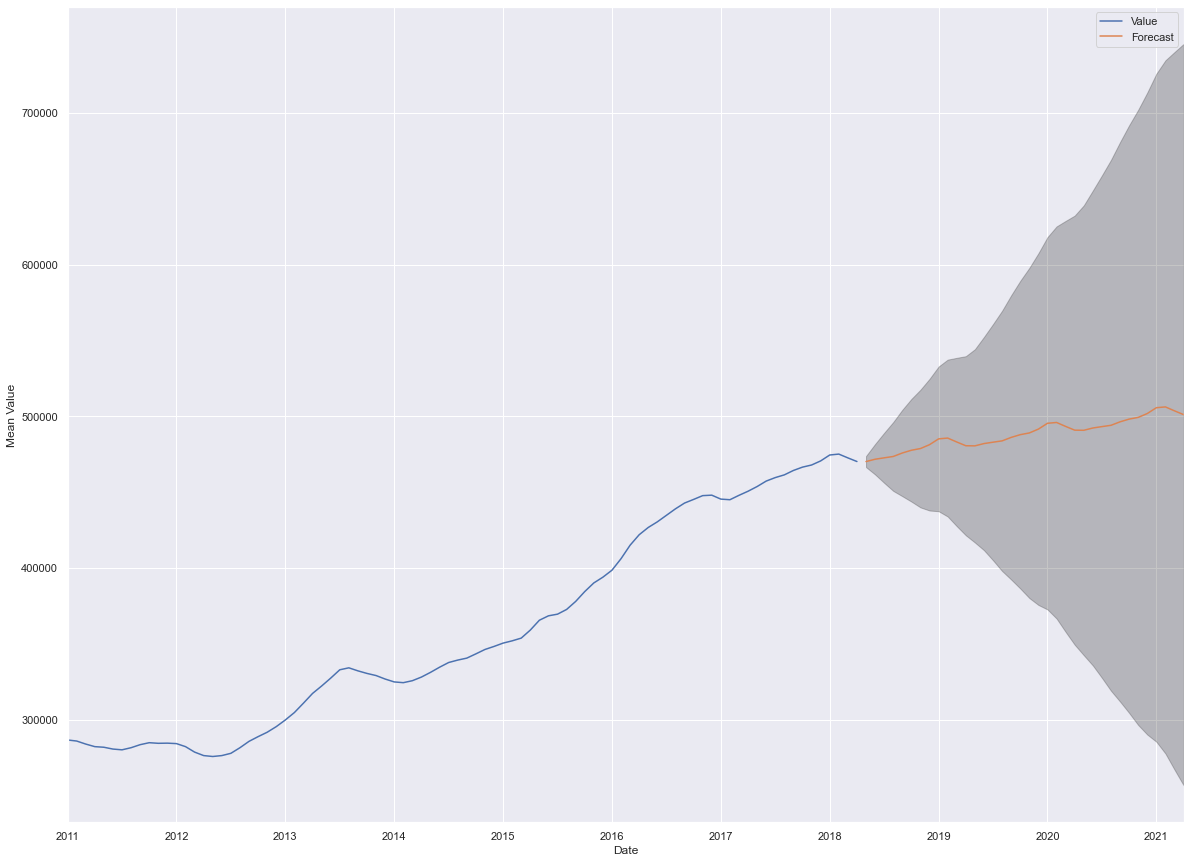

In [39]:
# 3-year predictions
ax = zip_ts.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Mean Value')

plt.legend()
plt.show()

In [40]:
# final forecast 
forecast_table = pd.DataFrame()
current = []
forecast_3Yr = []
forecast_5Yr = []

pred_3 = output.get_forecast(steps = 36)
pred_conf_3 = pred_3.conf_int()
forecast_3 = pred_3.predicted_mean.to_numpy()[-1]
forecast_3Yr.append(forecast_3)
current.append(zip_ts.Value[-1])
    

forecast_table['Current Value'] = current
forecast_table['3 Years Value'] = forecast_3Yr
forecast_table['3Yr-ROI']=((forecast_table['3 Years Value'] 
                           - forecast_table['Current Value'])/forecast_table['Current Value']*100)

In [41]:
forecast_table.sort_values('3Yr-ROI', ascending=False).head()

,Current Value,3 Years Value,3Yr-ROI
0,470200.0,501153.317961,6.583011


In [42]:
zip_truth = zip_ts['2015-04':]
zip_forecasted = pred.predicted_mean

mse = ((zip_forecasted - zip_truth) ** 2).mean()
rmse = np.sqrt(((zip_forecasted - zip_truth)**2).mean())
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The RMSE of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 2015-04-01 00:00:00   NaN
2015-05-01 00:00:00   NaN
2015-06-01 00:00:00   NaN
2015-07-01 00:00:00   NaN
2015-08-01 00:00:00   NaN
2015-09-01 00:00:00   NaN
2015-10-01 00:00:00   NaN
2015-11-01 00:00:00   NaN
2015-12-01 00:00:00   NaN
2016-01-01 00:00:00   NaN
2016-02-01 00:00:00   NaN
2016-03-01 00:00:00   NaN
2016-04-01 00:00:00   NaN
2016-05-01 00:00:00   NaN
2016-06-01 00:00:00   NaN
2016-07-01 00:00:00   NaN
2016-08-01 00:00:00   NaN
2016-09-01 00:00:00   NaN
2016-10-01 00:00:00   NaN
2016-11-01 00:00:00   NaN
2016-12-01 00:00:00   NaN
2017-01-01 00:00:00   NaN
2017-02-01 00:00:00   NaN
2017-03-01 00:00:00   NaN
2017-04-01 00:00:00   NaN
2017-05-01 00:00:00   NaN
2017-06-01 00:00:00   NaN
2017-07-01 00:00:00   NaN
2017-08-01 00:00:00   NaN
2017-09-01 00:00:00   NaN
2017-10-01 00:00:00   NaN
2017-11-01 00:00:00   NaN
2017-12-01 00:00:00   NaN
2018-01-01 00:00:00   NaN
2018-02-01 00:00:00   NaN
2018-03-01 00:00:00   NaN
2018-04-01 00:00:00  

In [43]:
chi_forecasted = pd.DataFrame(pred_dynamic.predicted_mean)
chi_truth = zip_ts['2015-04':]

mse = mean_squared_error(zip_truth, zip_forecasted)
rmse = np.sqrt(mean_squared_error(zip_truth, zip_forecasted))
print(f'The Root Mean Squared Error of our forecasts is {round(rmse, 3)}')
print(f'The Mean Squared Error of our forecasts is {round(mse, 3)}')

NameError: name 'mean_squared_error' is not defined

In [ ]:
df_copy = df.copy()

In [ ]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m')
df.set_index('Time', inplace = True)
df.head()

In [ ]:
zip_dfs = []
zip_list = df.ZipCode.unique()
for x in zip_list:
    zip_dfs.append(pd.DataFrame(df[df['ZipCode']==x][['Value']].copy()))

In [ ]:
zip_dfs[4]

In [ ]:
zip_list

In [ ]:
train = df.loc['2011-01-01':'2015-03-01']
test = df.loc['2015-04-01':]

In [ ]:
train.head()
# test.head()

In [ ]:
train_zip_dfs = []
zip_list = df.ZipCode.unique()
for x in zip_list:
    train_zip_dfs.append(pd.DataFrame(df[df['ZipCode']==x][['Value']].copy()))

In [ ]:
test_zip_dfs = []
zip_list = df.ZipCode.unique()
for x in zip_list:
    test_zip_dfs.append(pd.DataFrame(df[df['ZipCode']==x][['Value']].copy()))

In [ ]:
tsa.plot_acf(zip_dfs[4]);
tsa.plot_pacf(zip_dfs[4]);

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
auto_arima(df['Value'],seasonal=True, m=12).summary()

In [ ]:
df.head()

In [ ]:
zipcodes1 = df.ZipCode.sort_values().unique()

In [ ]:
zipcodes1

In [2]:
for z in zipcodes1:
    df_z = df[df.ZipCode == z]
    result = adfuller(df_z.Value.dropna())
    print('Zip: ', z)
    print('ADF Statistic %f' % result[0])
    print('p-value: %f' % result[1])

NameError: name 'zipcodes1' is not defined

In [1]:
orders = {}
ans = []
for train, name in zip(train_zip_dfs, zip_list):
    
    import warnings
    warnings.filterwarnings('ignore')
    for para1 in pdq:
        for para2 in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(train,
                                                order = para1,
                                                seasonal_order = para2,
                                                enforce_stationarity = False,
                                                enforce_invertibility = False)
                output = mod.fit()
                ans.append([name, para1, para2, output.aic])
#                 print('Result for {}'.format(name) + ' ARIMA {} x {}12 : AIC Calculated = {}'.format(para1, para2, output.aic))
            except:
                continue
    orders[name] = ans

NameError: name 'train_zip_dfs' is not defined

In [74]:
result = pd.DataFrame(ans, columns = ['name','pdq','pdqs','AIC'])
result

,name,pdq,pdqs,AIC
0,60657,"(0, 0, 0)","(0, 0, 0, 12)",2631.896915
1,60657,"(0, 0, 0)","(0, 0, 1, 12)",2230.124144
2,60657,"(0, 0, 0)","(0, 1, 0, 12)",1835.896786
3,60657,"(0, 0, 0)","(0, 1, 1, 12)",1545.195398
4,60657,"(0, 0, 0)","(1, 0, 0, 12)",1736.345346
...,...,...,...,...
1275,60608,"(1, 1, 1)","(0, 1, 1, 12)",1068.956038
1276,60608,"(1, 1, 1)","(1, 0, 0, 12)",1234.789959
1277,60608,"(1, 1, 1)","(1, 0, 1, 12)",1215.892289
1278,60608,"(1, 1, 1)","(1, 1, 0, 12)",1092.400975


In [75]:
best_para = result.loc[result.groupby("name")["AIC"].idxmin()]
best_para

,name,pdq,pdqs,AIC
1275,60608,"(1, 1, 1)","(0, 1, 1, 12)",1068.956038
639,60610,"(1, 1, 1)","(1, 1, 1, 12)",1194.672075
379,60613,"(1, 1, 1)","(0, 1, 1, 12)",1151.599769
127,60614,"(1, 1, 1)","(1, 1, 1, 12)",1142.278135
1087,60615,"(1, 1, 1)","(1, 1, 1, 12)",1137.320581
955,60616,"(1, 1, 1)","(0, 1, 1, 12)",1047.879682
319,60618,"(1, 1, 1)","(1, 1, 1, 12)",1052.221303
571,60619,"(1, 1, 1)","(0, 1, 1, 12)",1054.336003
703,60620,"(1, 1, 1)","(1, 1, 1, 12)",1027.969481
1019,60622,"(1, 1, 1)","(0, 1, 1, 12)",1155.263054


In [76]:
#Predictions 
summary_table = pd.DataFrame()
Zipcode = []
MSE_Value = []
models = {}
for name, pdq, pdqs, train in zip(best_para['name'], best_para['pdq'], best_para['pdqs'], train_zip_dfs):
    ARIMA_MODEL = sm.tsa.SARIMAX(train,
                                 order = pdq,
                                 seasonal_order = pdqs,
                                 enforce_stationarity = False,
                                 enforce_invertibility = False,
                                 )
                                
    
    output = ARIMA_MODEL.fit()
    models[name] = output
    
    #dynamic predictions starting 2015-04-01 - three years
    pred_dynamic = output.get_prediction(start=pd.to_datetime('2015-04-01'), dynamic = True, full_results = True)
    pred_dynamic_conf = pred_dynamic.conf_int()
    zip_forecasted = pred_dynamic.predicted_mean
    zip_truth = test['2015-04-01':]['Value']
    
    sqrt_mse = np.sqrt(((zip_forecasted - zip_truth)**2).mean())
    
    Zipcode.append(name)
    MSE_Value.append(sqrt_mse)
    
summary_table['Zipcode'] = Zipcode
summary_table['Sqrt_MSE'] = MSE_Value

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6354      0.114      5.578      0.000       0.412       0.859
ma.L1          0.7294      0.145      5.014      0.000       0.444       1.014
ma.S.L12      -0.1182      0.071     -1.657      0.097      -0.258       0.022
sigma2      2.093e+06   3.27e+05      6.390      0.000    1.45e+06    2.73e+06


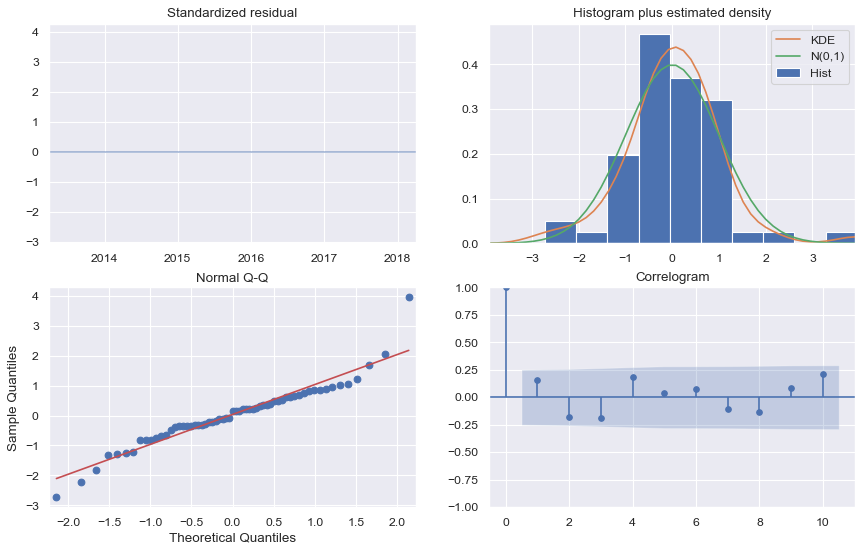

In [77]:
print(output.summary().tables[1])
output.plot_diagnostics(figsize=(13,8));

In [78]:
#full data set
forecast_table = pd.DataFrame()
current = []
forecast_3Yr = []


for zipcode, output, df in zip(Zipcode, models, zip_dfs):
    pred_3 = output.get_forecast(steps = 36)
    pred_conf_3 = pred_3.conf_int()
    forecast_3 = pred_3.predicted_mean.to_numpy()[-1]
    current.append(df['2018-04']['Value'][0])
    forecast_3Yr.append(forecast_3)
    
    
    ax = df.plot(label='observed', figsize=(20, 15))
    prediction.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_conf.index,
                    pred_conf.iloc[:, 0],
                    pred_conf.iloc[:, 1], color='k', alpha=0.25)
    ax.set_xlabel('Date')
    ax.set_ylabel('Mean Value')
    plt.title("Final Forecast " + str(zipcode))
    plt.legend()
    plt.show()
#     print(zipcode)
    
    
forecast_table['Zipcode'] = Zipcode
forecast_table['Current Value'] = current
forecast_table['3 Years Value'] = forecast_3Yr
forecast_table['3Yr-ROI']=((forecast_table['3 Years Value'] 
                           - forecast_table['Current Value'])/forecast_table['Current Value']*100)


AttributeError: 'int' object has no attribute 'get_forecast'

In [573]:
forecast_table.sort_values('3Yr-ROI', ascending=False).head()

,Zipcode,Current Value,3 Years Value,3Yr-ROI,5 Years Value,5Yr-ROI
13,60634,136800.0,1.924061e+05,40.647700,2.121010e+05,55.044618
5,60616,1055300.0,1.281767e+06,21.460000,2.519260e+06,138.724503
16,60647,456200.0,5.384073e+05,18.020004,6.100894e+05,33.732872
2,60613,782800.0,8.860975e+05,13.195894,1.032725e+06,31.927014
17,60649,291500.0,3.097434e+05,6.258447,3.571375e+05,22.517164
